<a href="https://colab.research.google.com/github/mhadeli/Time-series-forecasting/blob/main/Historical_Hourly_Weather_Data_2012_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load requries libraires
import pandas as pd
import numpy as np

In [ ]:
# Mount Googl drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the CSV files
file_names = [
    "city_attributes",
    "humidity",
    "pressure",
    "temperature",
    "weather_description",
    "wind_direction",
    "wind_speed",
]

dataframes = {}

for file_name in file_names:
    dataframes[file_name] = pd.read_csv(
        f"/content/drive/MyDrive/Weather_Datasets/{file_name}.csv"
    )

# Access the DataFrames using their respective names
city_attributes = dataframes["city_attributes"]
humidity = dataframes["humidity"]
pressure = dataframes["pressure"]
temperature = dataframes["temperature"]
weather_description = dataframes["weather_description"]
wind_direction = dataframes["wind_direction"]
wind_speed = dataframes["wind_speed"]

In [ ]:
city_attributes.head()

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683


In [ ]:
import folium

# Create a map centered around San Francisco
m = folium.Map(location=[37.774929, -122.419418], zoom_start=5)

# Add markers for each city in the DataFrame
for index, row in city_attributes.iterrows():
    city = row["City"]
    country = row["Country"]
    lat = row["Latitude"]
    lon = row["Longitude"]

    # Highlight San Francisco with a different color
    if city == "San Francisco":
        color = "red"
    else:
        color = "blue"

    folium.Marker(
        location=[lat, lon],
        popup=f"{city}, {country}",
        icon=folium.Icon(color=color),
    ).add_to(m)

# Display the map
m

In [ ]:
dataframes = {
    'humidity': humidity,
    'pressure': pressure,
    'temperature': temperature,
    'weather_description': weather_description,
    'wind_direction': wind_direction,
    'wind_speed': wind_speed,
}

# Initialize the result DataFrame with the 'datetime' column
dataset = dataframes['humidity'][['datetime']].copy()

# Iterate through the DataFrames and join on the 'datetime' column
for name, df in dataframes.items():
    dataset = dataset.merge(df, on='datetime')


<ipython-input-6-bb837b43f3c2>:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Phoenix_x', 'Boston_x', 'Miami_x', 'Houston_x', 'Nahariyya_x', 'Minneapolis_x', 'Haifa_x', 'Nashville_x', 'Saint Louis_x', 'Tel Aviv District_x', 'Eilat_x', 'Jacksonville_x', 'Toronto_x', 'San Francisco_x', 'San Diego_x', 'Denver_x', 'Atlanta_x', 'Indianapolis_x', 'Chicago_x', 'San Antonio_x', 'Vancouver_x', 'Philadelphia_x', 'New York_x', 'Pittsburgh_x', 'Charlotte_x', 'Portland_x', 'Dallas_x', 'Kansas City_x', 'Los Angeles_x', 'Montreal_x', 'Jerusalem_x', 'Beersheba_x', 'Seattle_x', 'Albuquerque_x', 'Las Vegas_x', 'Detroit_x'} in the result is deprecated and will raise a MergeError in a future version.
  dataset = dataset.merge(df, on='datetime')
<ipython-input-6-bb837b43f3c2>:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Phoenix_x', 'Boston_x', 'Miami_x', 'Houston_x', 'Nahariyya_x', 'Minneapolis_x', 'Haifa_x', 'Nashville_x', 'Saint Louis_x', 'Tel Aviv District

In [ ]:
# Initialize the result DataFrame with the 'datetime' column
dataset = dataframes['humidity'][['datetime']].copy()

# Iterate through the DataFrames and join on the 'datetime' column
for name, df in dataframes.items():
    # Select only the 'datetime' and 'San Francisco' columns
    selected_columns = df[['datetime', 'San Francisco']]

    # Merge the selected columns into the dataset DataFrame
    dataset = dataset.merge(selected_columns, on='datetime')


<ipython-input-7-9bb1700b9849>:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'San Francisco_x'} in the result is deprecated and will raise a MergeError in a future version.
  dataset = dataset.merge(selected_columns, on='datetime')
<ipython-input-7-9bb1700b9849>:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'San Francisco_x'} in the result is deprecated and will raise a MergeError in a future version.
  dataset = dataset.merge(selected_columns, on='datetime')


In [ ]:
# Rename the columns to more indicative names
new_column_names = [
    'humidity',
    'pressure',
    'temperature',
    'weather_description',
    'wind_direction',
    'wind_speed'
]

# Keep the first column name unchanged
all_column_names = [dataset.columns[0]] + new_column_names

# Assign the new column names to the dataset
dataset.columns = all_column_names

In [ ]:
dataset.head(3)

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,88.0,1009.0,289.480000,light rain,150.0,2.0
2,2012-10-01 14:00:00,87.0,1009.0,289.474993,sky is clear,147.0,2.0


# Preprocessing

## Convert to Date

In [ ]:
# Check the datatype of each column
data_types = dataset.dtypes

# Print the data types of each column
print(data_types)

datetime                object
humidity               float64
pressure               float64
temperature            float64
weather_description     object
wind_direction         float64
wind_speed             float64
dtype: object


In [ ]:
dataset['datetime'] = pd.to_datetime(dataset['datetime'])

# **Missing Value**

In [ ]:
# Calculate the number of null values in each column
null_values = dataset.isnull().sum()

# Calculate the percentage of null values in each column
null_percentages = (dataset.isnull().sum() / len(dataset)) * 100

# Combine the number and percentage of null values in a new DataFrame
null_info = pd.concat([null_values, null_percentages], axis=1)
null_info.columns = ['Number of Nulls', 'Percentage of Nulls']

# Display the null values information
print(null_info)

                     Number of Nulls  Percentage of Nulls
datetime                           0             0.000000
humidity                         942             2.081630
pressure                         815             1.800986
temperature                      793             1.752370
weather_description              793             1.752370
wind_direction                   794             1.754580
wind_speed                       794             1.754580


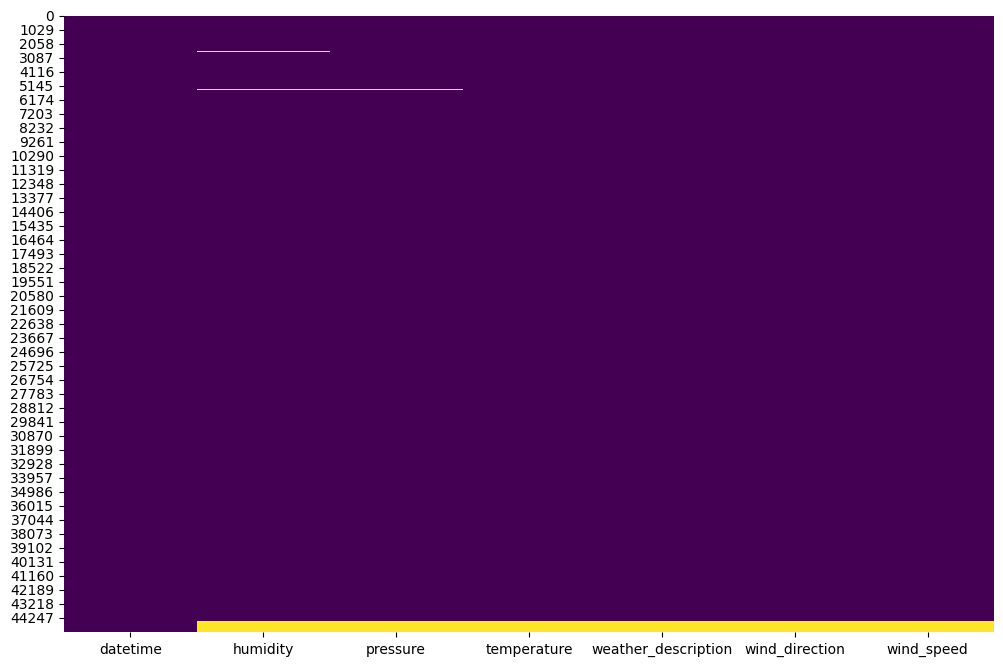

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the location of missing value in the data

# Create a heatmap of null values
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
# Interpolate missing values for continuous variables using the linear method
continuous_variables = ['humidity', 'pressure', 'temperature', 'wind_direction', 'wind_speed']
dataset[continuous_variables] = dataset[continuous_variables].interpolate(method='linear')

# Fill missing values for categorical variables using the forward fill method
categorical_variables = ['weather_description']
dataset[categorical_variables] = dataset[categorical_variables].fillna(method='ffill')

# Check for remaining missing values (if any)
print("Remaining missing values (if any):")
print(dataset.isnull().sum())

Remaining missing values (if any):
datetime               0
humidity               1
pressure               1
temperature            1
weather_description    1
wind_direction         1
wind_speed             1
dtype: int64


In [ ]:
# Select rows containing null values
null_rows = dataset[dataset.isnull().any(axis=1)]

# Display the rows with null values
display(null_rows)

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Keep all rows starting from the second row
dataset = dataset.iloc[1:]

In [ ]:
# Check for any remaining missing values in the training data
print(dataset.isnull().sum())

datetime               0
humidity               0
pressure               0
temperature            0
weather_description    0
wind_direction         0
wind_speed             0
dtype: int64


# Encode the Target Label

In [ ]:
# Unique value in target column
unique_values = dataset['weather_description'].unique()
unique_count = dataset['weather_description'].nunique()

print("Unique values in 'weather_description' column:\n")
print(unique_values)
print("\nNumber of unique values:", unique_count)

Unique values in 'weather_description' column:

['light rain' 'sky is clear' 'haze' 'scattered clouds' 'overcast clouds'
 'broken clouds' 'mist' 'few clouds' 'fog' 'proximity thunderstorm'
 'light intensity drizzle' 'moderate rain' 'thunderstorm'
 'heavy intensity rain' 'thunderstorm with heavy rain'
 'proximity shower rain' 'heavy intensity drizzle' 'heavy snow' 'drizzle'
 'thunderstorm with rain' 'thunderstorm with light rain' 'very heavy rain'
 'proximity thunderstorm with rain' 'light intensity shower rain' 'smoke'
 'shower rain' 'squalls' 'light snow']

Number of unique values: 28


In [ ]:
def categorize_weather(weather_description):
    if 'rain' in weather_description or 'drizzle' in weather_description:
        return 'Rain'
    else:
        return 'Not_rain'

dataset['weather_category'] = dataset['weather_description'].apply(categorize_weather)

unique_values = dataset['weather_category'].unique()
unique_count = dataset['weather_category'].nunique()

print("Unique values in 'weather_category' column:")
print(unique_values)
print("\nNumber of unique values:", unique_count)


Unique values in 'weather_category' column:
['Rain' 'Not_rain']

Number of unique values: 2


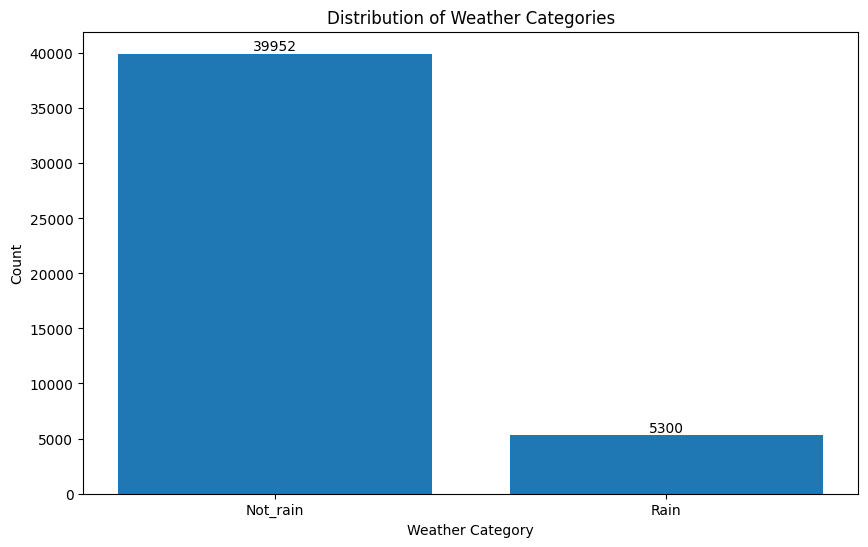

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of each weather category
category_counts = dataset['weather_category'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Weather Category')
plt.ylabel('Count')
plt.title('Distribution of Weather Categories')

# Add the value of each column above the corresponding bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Display the bar chart
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the new column 'weather_category'
encoder = LabelEncoder()
dataset['weather_encoded'] = encoder.fit_transform(dataset['weather_category'])

# Check the encoded values and their corresponding categories
print("Encoded weather categories:")
print(dataset[['weather_category', 'weather_encoded']].drop_duplicates().sort_values(by='weather_encoded'))

Encoded weather categories:
  weather_category  weather_encoded
2         Not_rain                0
1             Rain                1


In [ ]:
dataset.head(3)

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed,weather_category,weather_encoded
1,2012-10-01 13:00:00,88.0,1009.0,289.480000,light rain,150.0,2.0,Rain,1
2,2012-10-01 14:00:00,87.0,1009.0,289.474993,sky is clear,147.0,2.0,Not_rain,0
3,2012-10-01 15:00:00,86.0,1009.0,289.460618,sky is clear,141.0,2.0,Not_rain,0


In [ ]:
# Drop the unnecessary columns
dataset = dataset.drop(columns=['weather_description', 'weather_category'])

# Check the remaining columns in the dataset
print("Remaining columns in the dataset:")
print(dataset.columns)

Remaining columns in the dataset:
Index(['datetime', 'humidity', 'pressure', 'temperature', 'wind_direction',
       'wind_speed', 'weather_encoded'],
      dtype='object')


In [ ]:
dataset.head(3)

,datetime,humidity,pressure,temperature,wind_direction,wind_speed,weather_encoded
1,2012-10-01 13:00:00,88.0,1009.0,289.480000,150.0,2.0,1
2,2012-10-01 14:00:00,87.0,1009.0,289.474993,147.0,2.0,0
3,2012-10-01 15:00:00,86.0,1009.0,289.460618,141.0,2.0,0


In [ ]:
# Convert the 'datetime' column to a datetime object and set it as the index (time series handling)
dataset['datetime'] = pd.to_datetime(dataset['datetime'])
dataset.set_index('datetime', inplace=True)

# Define a custom aggregation function to calculate the mode of a series
def mode(series):
    return series.mode().iloc[0]

# Create a dictionary specifying the aggregation function for each column
aggregations = {
    'humidity': 'mean',
    'pressure': 'mean',
    'temperature': 'mean',
    'wind_direction': 'mean',
    'wind_speed': 'mean',
    'weather_encoded': mode
}

# Resample the time series data to daily frequency and aggregate the data using the specified functions (time series handling)
daily_dataset = dataset.resample('D').agg(aggregations)

In [ ]:
daily_dataset.head()

,humidity,pressure,temperature,wind_direction,wind_speed,weather_encoded
datetime,,,,,,
2012-10-01,83.000000,1009.727273,289.416642,122.363636,1.636364,0
2012-10-02,65.958333,1011.250000,292.958306,102.500000,1.708333,0
2012-10-03,47.083333,1011.041667,296.929167,111.250000,2.375000,0
2012-10-04,60.166667,1010.583333,295.687083,162.500000,2.791667,0
2012-10-05,69.666667,1015.041667,290.635417,205.833333,2.125000,0


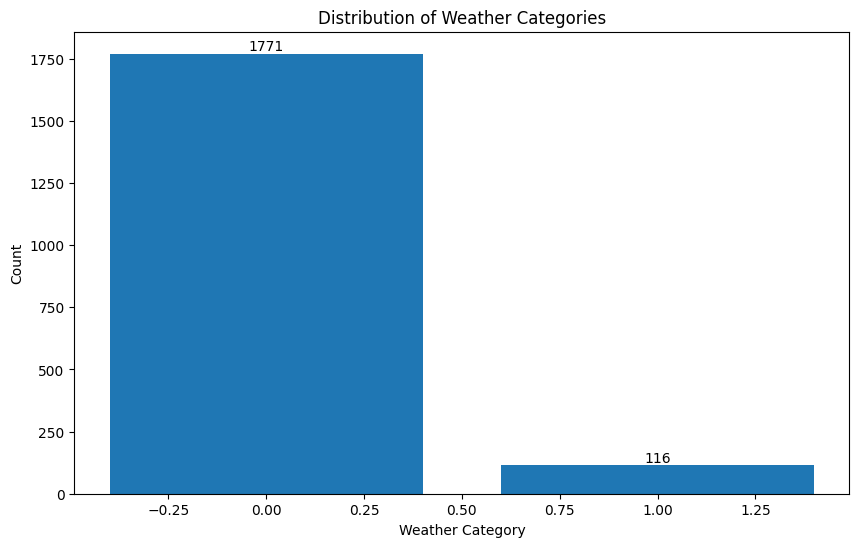

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of each weather category
category_counts = daily_dataset['weather_encoded'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Weather Category')
plt.ylabel('Count')
plt.title('Distribution of Weather Categories')

# Add the value of each column above the corresponding bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Display the bar chart
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the numerical features
scaler = MinMaxScaler()
numerical_features = ['humidity', 'pressure', 'temperature', 'wind_direction', 'wind_speed']
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

dataset.head(3)

,datetime,humidity,pressure,temperature,wind_direction,wind_speed,weather_encoded
1,2012-10-01 13:00:00,0.872340,0.40678,0.415779,0.416667,0.046512,1
2,2012-10-01 14:00:00,0.861702,0.40678,0.415658,0.408333,0.046512,0
3,2012-10-01 15:00:00,0.851064,0.40678,0.415310,0.391667,0.046512,0


In [ ]:
# Shift the target label one row ahead
dataset['weather_encoded'] = dataset['weather_encoded'].shift(-1)

In [ ]:
dataset.tail()

,datetime,humidity,pressure,temperature,wind_direction,wind_speed,weather_encoded
45248,2017-11-29 20:00:00,0.170213,0.474576,0.720474,0.361111,0.046512,0.0
45249,2017-11-29 21:00:00,0.170213,0.474576,0.720474,0.361111,0.046512,0.0
45250,2017-11-29 22:00:00,0.170213,0.474576,0.720474,0.361111,0.046512,0.0
45251,2017-11-29 23:00:00,0.170213,0.474576,0.720474,0.361111,0.046512,0.0
45252,2017-11-30 00:00:00,0.170213,0.474576,0.720474,0.361111,0.046512,NaN


In [ ]:
# Remove the last row with the missing value in the target column
dataset = dataset.dropna()

In [ ]:
# Set the datatime column as index
dataset.set_index('datetime', inplace=True)

In [ ]:
def mode(series):
    return series.mode().iloc[0]

aggregations = {
    'humidity': 'mean',
    'pressure': 'mean',
    'temperature': 'mean',
    'wind_direction': 'mean',
    'wind_speed': 'mean',
    'weather_encoded': mode
}

daily_dataset = dataset.resample('D').agg(aggregations)

In [ ]:
daily_dataset.head()

,humidity,pressure,temperature,wind_direction,wind_speed,weather_encoded
datetime,,,,,,
2012-10-01,0.819149,0.419106,0.414246,0.339899,0.038055,0.0
2012-10-02,0.637855,0.444915,0.499959,0.284722,0.039729,0.0
2012-10-03,0.437057,0.441384,0.596059,0.309028,0.055233,0.0
2012-10-04,0.576241,0.433616,0.565999,0.451389,0.064922,1.0
2012-10-05,0.677305,0.509181,0.443742,0.571759,0.049419,1.0


In [ ]:
value_counts = daily_dataset['weather_encoded'].value_counts()
percentage_counts = daily_dataset['weather_encoded'].value_counts(normalize=True) * 100
summary = pd.DataFrame({'Counts': value_counts, 'Percentage': percentage_counts})
print(summary)

     Counts  Percentage
1.0    1234   65.429480
0.0     513   27.200424
3.0     139    7.370095


In [ ]:
dataset.shape

(45251, 6)

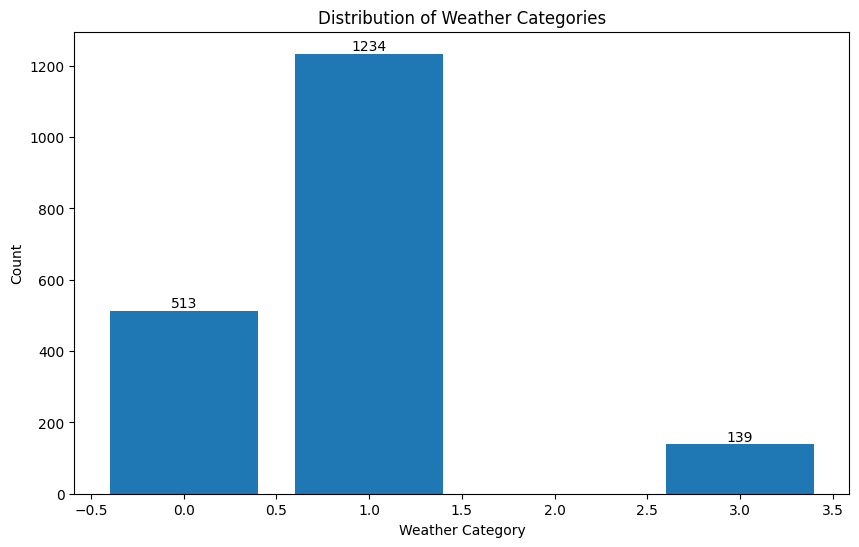

In [ ]:
import matplotlib.pyplot as plt

# Calculate the count of each weather category
category_counts = daily_dataset['weather_encoded'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Weather Category')
plt.ylabel('Count')
plt.title('Distribution of Weather Categories')

# Add the value of each column above the corresponding bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Display the bar chart
plt.show()

In [ ]:
# Apply rolling window average
window_size = 3  # Choose an appropriate window size based on your data and domain knowledge
numerical_features = ['humidity', 'pressure', 'temperature', 'wind_direction', 'wind_speed']
smoothed_data = df[numerical_features].rolling(window=window_size).mean()

# Drop rows with missing values generated by the rolling operation
smoothed_data = smoothed_data.dropna()
smoothed_target = df['weather_encoded'][window_size - 1:].reset_index(drop=True)

# Combine the smoothed data with the datetime column
smoothed_data['datetime'] = df['datetime'][window_size - 1:].reset_index(drop=True)
smoothed_data['weather_encoded'] = smoothed_target


In [ ]:
# Calculate the moving average with a window size of 24 (daily)
dataset = dataset.rolling(window=24).mean()

# Display the smoothed dataset
display(dataset)

,index,humidity,pressure,temperature,wind_direction,wind_speed,weather_encoded
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
45247,45236.5,22.0,1013.0,302.07,130.0,2.0,4.625929e-17
45248,45237.5,22.0,1013.0,302.07,130.0,2.0,4.625929e-17
45249,45238.5,22.0,1013.0,302.07,130.0,2.0,4.625929e-17
45250,45239.5,22.0,1013.0,302.07,130.0,2.0,4.625929e-17


In [ ]:
# Drop rows with missing values
dataset = dataset.dropna()
dataset.head()

,level_0,index,humidity,pressure,temperature,wind_direction,wind_speed,weather_encoded
46,46,35.5,63.746528,1011.359375,292.970205,113.322917,1.923611,0.215278
47,47,36.5,62.770833,1011.328125,293.275259,116.753472,2.015625,0.229167
48,48,37.5,61.798611,1011.282986,293.583684,120.423611,2.111111,0.248264
49,49,38.5,60.842014,1011.220486,293.894669,124.348958,2.210069,0.269097
50,50,39.5,59.949653,1011.137153,294.206819,128.519097,2.312500,0.289931


In [ ]:
dataset["target"] = dataset['weather_encoded'].shift (-1)
dataset = dataset.drop(dataset.tail(1).index)
dataset.head()

,level_0,index,humidity,pressure,temperature,wind_direction,wind_speed,weather_encoded,target
46,46,35.5,63.746528,1011.359375,292.970205,113.322917,1.923611,0.215278,0.229167
47,47,36.5,62.770833,1011.328125,293.275259,116.753472,2.015625,0.229167,0.248264
48,48,37.5,61.798611,1011.282986,293.583684,120.423611,2.111111,0.248264,0.269097
49,49,38.5,60.842014,1011.220486,293.894669,124.348958,2.210069,0.269097,0.289931
50,50,39.5,59.949653,1011.137153,294.206819,128.519097,2.312500,0.289931,0.307292


In [ ]:
import plotly.graph_objs as go

# Resample the dataset to get the counts of each weather category per month
monthly_counts = dataset.resample('M', on='datetime')['target'].value_counts().unstack().fillna(0)

# Reset the index to make 'datetime' a regular column
monthly_counts.reset_index(inplace=True)

# Create a stacked bar plot for the monthly counts of each weather category
fig = go.Figure()

category_map = {0: 'Clear', 1: 'Cloudy', 2: 'Extreme', 3: 'Rain'}
colors = ['yellow', 'gray', 'red', 'blue']

for i, (category, color) in enumerate(zip(category_map.values(), colors)):
    fig.add_trace(go.Bar(x=monthly_counts['datetime'], y=monthly_counts[i], name=category, marker=dict(color=color)))

# Set the title and axis labels
fig.update_layout(
    title='Monthly Weather Condition in San Francisco',
    xaxis_title='Month',
    yaxis_title='Count',
    barmode='stack'
)

# Show the plot
fig.show()

KeyError: ignored

In [ ]:
# Set the 'datetime' column as the index
dataset.set_index('datetime', inplace=True)

In [ ]:
result = dataset.dtypes
print(result)

humidity           float64
pressure           float64
temperature        float64
wind_direction     float64
wind_speed         float64
weather_encoded      int64
dtype: object


In [ ]:
# Professor's work

In [ ]:
import os
import zipfile
import pandas as pd
import sklearn.metrics
import sklearn.preprocessing
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import plotly.graph_objects as go

In [ ]:
# Convert the 'weather_encoded' column to integer
smoothed_dataset['weather_encoded'] = smoothed_dataset['weather_encoded'].astype(int)

# Slitting the Datsset

In [ ]:
# Set the datetime column as index
smoothed_dataset.set_index('datetime', inplace=True)

In [ ]:
train_start_index = 0
validation_start_index = int(smoothed_dataset. shape[0] * 0.70)
test_start_index = int(smoothed_dataset.shape [0] * 0.85)

df_train = smoothed_dataset.iloc[train_start_index:validation_start_index]
df_validation = smoothed_dataset.iloc [validation_start_index:test_start_index]
df_test = smoothed_dataset.iloc[test_start_index:]

x_train = df_train.drop("target", axis=1)
x_validation = df_validation.drop("target", axis=1)
x_test = df_test.drop("target", axis=1)

y_train = df_train["target"]
y_validation = df_validation["target"]
y_test = df_test["target"]

print("Train size:" , x_train.shape, y_train.shape)
print("Validation size:", x_validation.shape, y_validation.shape)
print("Test size:", x_test.shape, y_test.shape)

Train size: (31675, 6) (31675,)
Validation size: (6788, 6) (6788,)
Test size: (6788, 6) (6788,)


# Standardizing Features

In [ ]:
import sklearn.preprocessing

scaler = sklearn.preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_validation = scaler.transform(x_validation)
x_test = scaler.transform(x_test)

## **Creating Sequences**

In [ ]:
from tensorflow import keras

SEQUENCE_LENGTH = 10
BATCH_SIZE = 250

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length = SEQUENCE_LENGTH,
    batch_size = BATCH_SIZE,
)

In [ ]:
dataset_validation = keras.preprocessing. timeseries_dataset_from_array(
    x_validation,
    y_validation,
    sequence_length = SEQUENCE_LENGTH,
    batch_size = BATCH_SIZE,
)

In [ ]:
dataset_test = keras.preprocessing. timeseries_dataset_from_array(
    x_validation,
    y_validation,
    sequence_length = SEQUENCE_LENGTH,
    batch_size = BATCH_SIZE,
)

# Building the Model

In [ ]:
for batch in dataset_train.take(1):
  inputs, targets = batch

input_shape = inputs.shape[1:]

In [ ]:
from tensorflow import keras

num_classes = 4  # Change this to the number of classes you have

model = keras.models.Sequential()
model.add(keras.layers.Input(shape=input_shape))
model.add(keras.layers.LSTM(32))
model.add(keras.layers.Dense(num_classes, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy")
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4992      
                                                                 
 dense (Dense)               (None, 4)                 132       
                                                                 
Total params: 5,124
Trainable params: 5,124
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 500
es_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss", min_delta=0, patience=20
)

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_validation, y_validation),
    epochs=EPOCHS,
    batch_size=32,
    shuffle=False,
    callbacks=[es_callback],
)

Epoch 1/500


ValueError: ignored

In [ ]:
def create_sequences(data, target, sequence_length):
    x = []
    y = []

    for i in range(len(data) - sequence_length):
        x.append(data[i:i + sequence_length])
        y.append(target[i + sequence_length])

    return np.array(x), np.array(y)


In [ ]:
sequence_length = 10
x_train_seq, y_train_seq = create_sequences(x_train, y_train, sequence_length)
x_validation_seq, y_validation_seq = create_sequences(x_validation, y_validation, sequence_length)
x_test_seq, y_test_seq = create_sequences(x_test, y_test, sequence_length)


In [ ]:
EPOCHS = 500
es_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss", min_delta=0, patience=20
)

history = model.fit(
    x_train_seq,
    y_train_seq,
    validation_data=(x_validation_seq, y_validation_seq),
    epochs=EPOCHS,
    batch_size=32,
    shuffle=False,
    callbacks=[es_callback],
)


Epoch 1/500


ValueError: ignored

### Split the dataset

In [ ]:
split_ratio = 0.8
train_size = int(len(dataset) * split_ratio)

train_data = dataset.iloc[:train_size]
test_data = dataset.iloc[train_size:]

In [ ]:
test_data.head()

In [ ]:
train_data.head()

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
1,2012-10-01 13:00:00,88.0,1009.0,289.480000,light rain,150.0,2.0
2,2012-10-01 14:00:00,87.0,1009.0,289.474993,sky is clear,147.0,2.0
3,2012-10-01 15:00:00,86.0,1009.0,289.460618,sky is clear,141.0,2.0
4,2012-10-01 16:00:00,85.0,1009.0,289.446243,sky is clear,135.0,2.0
5,2012-10-01 17:00:00,84.0,1009.0,289.431869,sky is clear,129.0,2.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale the features
feature_columns = ['humidity', 'pressure', 'temperature', 'wind_direction', 'wind_speed']
target_column = 'weather_encoded'
scaler = MinMaxScaler(feature_range=(0, 1))
train_data[feature_columns] = scaler.fit_transform(train_data[feature_columns])

In [ ]:
train_data.head(3)

,datetime,humidity,pressure,temperature,wind_direction,wind_speed,weather_encoded
1,2012-10-01 13:00:00,0.870968,0.40678,0.459235,0.416667,0.046512,3
2,2012-10-01 14:00:00,0.860215,0.40678,0.459102,0.408333,0.046512,0
3,2012-10-01 15:00:00,0.849462,0.40678,0.458717,0.391667,0.046512,0


In [ ]:
import pandas as pd

#
split_index = int(len(train_data) * 0.8)  # 80% train, 20% test

# Dropping the 'datetime' column and converting it to a NumPy array
data = train_data.drop(['datetime', 'weather_encoded'], axis=1).values
target = train_data['weather_encoded'].values

X_train = data[:split_index]
y_train = target[:split_index]

X_test = data[split_index:]
y_test = target[split_index:]


In [ ]:
# Transform the time series data into a supervised learning problem

# To reduce memory consumption (I am running on Google Colab) one way is converting the data to a lower precision data type, such as 32-bit float (np.float32)

def create_dataset(data, feature_columns, target_column, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[feature_columns].iloc[i:i + look_back].values.astype(np.float32))
        y.append(data[target_column].iloc[i + look_back].astype(np.float32))
    return np.array(X), np.array(y)

look_back = 12
X_train, y_train = create_dataset(train_data, data, target, look_back)

KeyError: ignored

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Reshape the input for SMOTE
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Perform SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_reshaped, y_train)

# Reshape the input back to the original shape
X_train_oversampled = X_train_oversampled.reshape(-1, look_back, X_train.shape[2])

# Check the distribution of the oversampled data
print(Counter(y_train_oversampled))

Counter({0.0: 20402, 1.0: 20402, 2.0: 20402, 3.0: 20402})


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

import time
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Set the random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the model architecture
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    Dropout(0.3),
    LSTM(128, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    Dropout(0.3),
    LSTM(64, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)

# Train the model and measure the time taken
start_time = time.time()
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    shuffle=False
)
end_time = time.time()

# Evaluate the model on the test data
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate the mean absolute percentage error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

# Print the time taken to train the model
print(f"Time taken to train the model: {end_time - start_time:.2f} seconds")

# Determine the epoch at which the training stopped improving
stopping_epoch = early_stopping.stopped_epoch
if stopping_epoch == 0:
    print("The model did not stop early and completed all epochs.")
else:
    print(f"The model stopped improving after epoch {stopping_epoch}.")

IndexError: ignored

In [ ]:
# END

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error

# Evaluate the model on the test data
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate the mean absolute percentage error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

# Determine the epoch at which the training stopped improving
stopping_epoch = early_stopping.stopped_epoch
if stopping_epoch == 0:
    print("The model did not stop early and completed all epochs.")
else:
    print(f"The model stopped improving after epoch {stopping_epoch}.")


1131/1131 [==============================] - 4s 3ms/step
Accuracy: 29.90%
Mean Absolute Percentage Error (MAPE): 134701048292736048.00%
The model stopped improving after epoch 65.


In [ ]:


from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical


# 3. Balance the dataset using SMOTE
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten the input features
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
X_train_balanced = X_train_balanced.reshape(X_train_balanced.shape[0], look_back, len(feature_columns))  # Reshape the input features back to 3D

# Convert target values to one-hot encoded vectors
num_classes = len(np.unique(y_train_balanced))
y_train_balanced = to_categorical(y_train_balanced, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# 4. Create the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(X_train_balanced.shape[1], X_train_balanced.shape[2])))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. Train the model
model.fit(X_train_balanced, y_train_balanced, epochs=20, batch_size=64, verbose=2, validation_split=0.1)

# 6. Evaluate the model on the test dataset
model.evaluate(X_test, y_test, verbose=2)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 1. Scale the features
feature_columns = ['humidity', 'pressure', 'temperature', 'wind_direction', 'wind_speed']
target_column = 'weather_encoded'
scaler = MinMaxScaler(feature_range=(0, 1))
train_data[feature_columns] = scaler.fit_transform(train_data[feature_columns])
test_data[feature_columns] = scaler.transform(test_data[feature_columns])

<ipython-input-25-14b165f39ab3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[feature_columns] = scaler.transform(test_data[feature_columns])


In [ ]:

from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical



# 2. Transform your time series data into a supervised learning problem
def create_dataset(data, feature_columns, target_column, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[feature_columns].iloc[i:i + look_back].values)
        y.append(data[target_column].iloc[i + look_back])
    return np.array(X), np.array(y)

look_back = 12
X_train, y_train = create_dataset(train_data, feature_columns, target_column, look_back)
X_test, y_test = create_dataset(test_data, feature_columns, target_column, look_back)

# Convert target values to one-hot encoded vectors
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# 3. Create the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=2, validation_split=0.1)

# 5. Evaluate the model on the test dataset
model.evaluate(X_test, y_test, verbose=2)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 1. Scale your features
feature_columns = ['humidity', 'pressure', 'temperature', 'wind_direction', 'wind_speed']
target_column = 'weather_encoded'
scaler = MinMaxScaler(feature_range=(0, 1))
train_data[feature_columns] = scaler.fit_transform(train_data[feature_columns])
test_data[feature_columns] = scaler.transform(test_data[feature_columns])



In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense


# 2. Transform your time series data into a supervised learning problem
def create_dataset(data, feature_columns, target_column, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[feature_columns].iloc[i:i + look_back].values)
        y.append(data[target_column].iloc[i + look_back])
    return np.array(X), np.array(y)

look_back = 12
X_train, y_train = create_dataset(train_data, feature_columns, target_column, look_back)
X_test, y_test = create_dataset(test_data, feature_columns, target_column, look_back)


In [ ]:


# 3. Create the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# 4. Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=2, validation_split=0.1)

# 5. Evaluate the model on the test dataset
model.evaluate(X_test, y_test, verbose=2)


<ipython-input-26-652920f5ba25>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[feature_columns] = scaler.transform(test_data[feature_columns])


In [ ]:
# Keep all rows except the last 794
dataset = dataset.iloc[:-794]

The below function is a variation of "**linear interpolation**.".
The custom function computes the average of the immediate values before and after the missing value.
This approach can also be considered a simplified version of "imputation," where missing data points are replaced with substituted values.

In [ ]:
# Custom function to fill missing values with the average of the values before and after the missing value
def fill_with_average(series):
    for idx, value in series[series.isnull()].iteritems():
        before = series.iloc[:idx].dropna().iloc[-1] if idx > 0 else None
        after = series.iloc[idx+1:].dropna().iloc[0] if idx < len(series) - 1 else None

        if before is not None and after is not None:
            series.at[idx] = (before + after) / 2
        elif before is not None:
            series.at[idx] = before
        elif after is not None:
            series.at[idx] = after

    return series

# Fill missing values with the average of the values before and after the missing value for each column
dataset = dataset.apply(fill_with_average)

In [ ]:
dataset.head(3)

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
1,2012-10-01 13:00:00,88.0,1009.0,289.480000,light rain,150.0,2.0
2,2012-10-01 14:00:00,87.0,1009.0,289.474993,sky is clear,147.0,2.0
3,2012-10-01 15:00:00,86.0,1009.0,289.460618,sky is clear,141.0,2.0


In [ ]:
# Set the datetime column as index
# dataset.set_index('datetime', inplace=True)

In [ ]:
dataset.tail(3)

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed,hour
45250,2017-11-29 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,22
45251,2017-11-29 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,23
45252,2017-11-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0


## Encode Target Column

## Categorize the 'weather_description' to less catagories:

- Clear or Cloudy
  - sky is clear
  - few clouds
  - scattered clouds
  - broken clouds
  - overcast clouds
- Fog or Haze
  - mist
  - haze
  - fog
  - smoke
- Drizzle or Light Rain
  - light rain
  - light intensity drizzle
  - heavy intensity drizzle
  - light intensity shower rain
- Moderate or Heavy Rain
  - moderate rain
  - heavy intensity rain
  - very heavy rain
- Thunderstorms
  - thunderstorm
  - thunderstorm with light rain
  - thunderstorm with rain
  - thunderstorm with heavy rain
  - proximity thunderstorm
  - proximity thunderstorm with rain
- Snow
  - heavy snow
  - light snow
- Other
  - squalls
  - shower rain
  - proximity shower rain


In [ ]:
# Categorize the 'weather_description' to less (managable) catagories
def categorize_weather(weather_description):
    clear_cloudy = [
        "sky is clear",
        "few clouds",
        "scattered clouds",
        "broken clouds",
        "overcast clouds",
    ]
    fog_haze = ["mist", "haze", "fog", "smoke"]
    drizzle_light_rain = [
        "light rain",
        "light intensity drizzle",
        "heavy intensity drizzle",
        "light intensity shower rain",
    ]
    moderate_heavy_rain = ["moderate rain", "heavy intensity rain", "very heavy rain"]
    thunderstorms = [
        "thunderstorm",
        "thunderstorm with light rain",
        "thunderstorm with rain",
        "thunderstorm with heavy rain",
        "proximity thunderstorm",
        "proximity thunderstorm with rain",
    ]
    snow = ["heavy snow", "light snow"]
    other = ["squalls", "shower rain", "proximity shower rain"]

    if weather_description in clear_cloudy:
        return "Clear or Cloudy"
    elif weather_description in fog_haze:
        return "Fog or Haze"
    elif weather_description in drizzle_light_rain:
        return "Drizzle or Light Rain"
    elif weather_description in moderate_heavy_rain:
        return "Moderate or Heavy Rain"
    elif weather_description in thunderstorms:
        return "Thunderstorms"
    elif weather_description in snow:
        return "Snow"
    else:
        return "Other"


dataset["weather_category"] = dataset["weather_description"].apply(categorize_weather)


In [ ]:
# Encode the target label
def map_weather_categories(description):
    clear_or_cloudy = ["sky is clear", "few clouds", "scattered clouds", "broken clouds", "overcast clouds"]
    fog_or_haze = ["mist", "haze", "fog", "smoke"]
    drizzle_or_light_rain = ["light rain", "light intensity drizzle", "heavy intensity drizzle", "light intensity shower rain"]
    moderate_or_heavy_rain = ["moderate rain", "heavy intensity rain", "very heavy rain"]
    thunderstorms = ["thunderstorm", "thunderstorm with light rain", "thunderstorm with rain", "thunderstorm with heavy rain",
                     "proximity thunderstorm", "proximity thunderstorm with rain"]
    snow = ["heavy snow", "light snow"]
    other = ["squalls", "shower rain", "proximity shower rain"]

    if description in clear_or_cloudy:
        return "Clear or Cloudy"
    elif description in fog_or_haze:
        return "Fog or Haze"
    elif description in drizzle_or_light_rain:
        return "Drizzle or Light Rain"
    elif description in moderate_or_heavy_rain:
        return "Moderate or Heavy Rain"
    elif description in thunderstorms:
        return "Thunderstorms"
    elif description in snow:
        return "Snow"
    else:
        return "Other"


In [ ]:
#  Create a new column with the mapped categories
dataset['weather_category'] = dataset['weather_description'].apply(map_weather_categories)

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode 'weather_category' using LabelEncoder
dataset['weather_category_encoded'] = label_encoder.fit_transform(dataset['weather_category'])

# Save the label encoder for later use (to decode the predictions)
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

In [ ]:
# Drop the initial column as we keep the encoded column
dataset.drop(['weather_description', 'weather_category'], axis=1, inplace=True)

In [ ]:
dataset.head()

,datetime,humidity,pressure,temperature,wind_direction,wind_speed,hour,weather_category_encoded
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,12,4
1,2012-10-01 13:00:00,88.0,1009.0,289.480000,150.0,2.0,13,1
2,2012-10-01 14:00:00,87.0,1009.0,289.474993,147.0,2.0,14,0
3,2012-10-01 15:00:00,86.0,1009.0,289.460618,141.0,2.0,15,0
4,2012-10-01 16:00:00,85.0,1009.0,289.446243,135.0,2.0,16,0


In [ ]:
dataset.shape

(45253, 8)

In [ ]:
unique_value_counts = dataset['weather_category_encoded'].value_counts()

print(unique_value_counts)

0    26624
2    12279
1     3607
3     1330
4     1049
6      308
5       56
Name: weather_category_encoded, dtype: int64


In [ ]:
# Fill missing values using forward-fill
dataset.fillna(method='ffill', inplace=True)


In [ ]:
# Cap the outliers using the IQR method
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
for col in dataset.columns:
    if col not in ['datetime', 'weather_category_encoded']:
        dataset[col] = dataset[col].clip(lower_bound[col], upper_bound[col])


In [ ]:
# Extract day of the week, month, and year
dataset['day_of_week'] = dataset['datetime'].dt.dayofweek
dataset['month'] = dataset['datetime'].dt.month
dataset['year'] = dataset['datetime'].dt.year


In [ ]:
train_size = int(len(dataset) * 0.8)

train_df = dataset.iloc[:train_size]
test_df = dataset.iloc[train_size:]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Exclude the target label and datetime column
feature_columns = dataset.columns.difference(['weather_category_encoded', 'datetime'])

scaler = StandardScaler()
train_df[feature_columns] = scaler.fit_transform(train_df[feature_columns])
test_df[feature_columns] = scaler.transform(test_df[feature_columns])


<ipython-input-26-2935fadd330b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[feature_columns] = scaler.fit_transform(train_df[feature_columns])
<ipython-input-26-2935fadd330b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[feature_columns] = scaler.transform(test_df[feature_columns])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaled = train_df.copy()
test_scaled = test_df.copy()

train_scaled[feature_columns] = scaler.fit_transform(train_df[feature_columns])
test_scaled[feature_columns] = scaler.transform(test_df[feature_columns])

In [ ]:
X_train, y_train = create_sequences(train_scaled, 'weather_category_encoded', window_size)
X_test, y_test = create_sequences(test_scaled, 'weather_category_encoded', window_size)


In [ ]:
model = Sequential([
    LSTM(64, input_shape=(window_size, len(feature_columns)), return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=False),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(7, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005, clipvalue=1.0)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 64)            18944     
                                                                 
 batch_normalization_4 (Batc  (None, 12, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 12, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 64)               

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50
905/905 [==============================] - 17s 11ms/step - loss: nan - accuracy: 0.5928 - val_loss: nan - val_accuracy: 0.5854
Epoch 2/50
905/905 [==============================] - 8s 8ms/step - loss: nan - accuracy: 0.6509 - val_loss: nan - val_accuracy: 0.5854
Epoch 3/50
905/905 [==============================] - 9s 10ms/step - loss: nan - accuracy: 0.6509 - val_loss: nan - val_accuracy: 0.5854
Epoch 4/50
905/905 [==============================] - 9s 10ms/step - loss: nan - accuracy: 0.6509 - val_loss: nan - val_accuracy: 0.5854
Epoch 5/50
905/905 [==============================] - 8s 9ms/step - loss: nan - accuracy: 0.6509 - val_loss: nan - val_accuracy: 0.5854
Epoch 6/50
905/905 [==============================] - 9s 10ms/step - loss: nan - accuracy: 0.6509 - val_loss: nan - val_accuracy: 0.5854
Epoch 7/50
905/905 [==============================] - 8s 9ms/step - loss: nan - accuracy: 0.6509 - val_loss: nan - val_accuracy: 0.5854
Epoch 8/50
905/905 [=======================

KeyboardInterrupt: ignored

In [ ]:
def create_sequences(data, target_col, window_size):
    X = []
    y = []

    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i+window_size][feature_columns].values)
        y.append(data.iloc[i+window_size][target_col])

    return np.array(X), np.array(y)

window_size = 12

X_train, y_train = create_sequences(train_df, 'weather_category_encoded', window_size)
X_test, y_test = create_sequences(test_df, 'weather_category_encoded', window_size)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

model = Sequential([
    LSTM(64, input_shape=(window_size, len(feature_columns)), return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=False),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(7, activation='softmax')  # Since we have 7 classes, we use a softmax activation function
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 64)            18944     
                                                                 
 batch_normalization_2 (Batc  (None, 12, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 12, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 batch_normalization_3 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 64)               

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50
905/905 [==============================] - 8s 9ms/step - loss: nan - accuracy: 0.6509 - val_loss: nan - val_accuracy: 0.5854
Epoch 2/50
905/905 [==============================] - 9s 10ms/step - loss: nan - accuracy: 0.6509 - val_loss: nan - val_accuracy: 0.5854
Epoch 3/50
905/905 [==============================] - 9s 10ms/step - loss: nan - accuracy: 0.6509 - val_loss: nan - val_accuracy: 0.5854
Epoch 4/50
905/905 [==============================] - 8s 9ms/step - loss: nan - accuracy: 0.6509 - val_loss: nan - val_accuracy: 0.5854
Epoch 5/50
905/905 [==============================] - 10s 11ms/step - loss: nan - accuracy: 0.6509 - val_loss: nan - val_accuracy: 0.5854
Epoch 6/50
905/905 [==============================] - 9s 10ms/step - loss: nan - accuracy: 0.6509 - val_loss: nan - val_accuracy: 0.5854
Epoch 7/50
905/905 [==============================] - 8s 9ms/step - loss: nan - accuracy: 0.6509 - val_loss: nan - val_accuracy: 0.5854
Epoch 8/50
905/905 [=======================

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Set the ratios for training, validation, and test sets
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Calculate the indices for splitting
n = len(dataset)
train_idx = int(n * train_ratio)
val_idx = int(n * (train_ratio + val_ratio))

# Split the data into training, validation, and test sets
train_df = dataset.iloc[:train_idx]
val_df = dataset.iloc[train_idx:val_idx]
test_df = dataset.iloc[val_idx:]

# Separate the features and target label
X_train, y_train = train_df.drop('weather_category_encoded', axis=1), train_df['weather_category_encoded']
X_val, y_val = val_df.drop('weather_category_encoded', axis=1), val_df['weather_category_encoded']
X_test, y_test = test_df.drop('weather_category_encoded', axis=1), test_df['weather_category_encoded']

# Remove the 'datetime' column
X_train = X_train.drop('datetime', axis=1)
X_val = X_val.drop('datetime', axis=1)
X_test = X_test.drop('datetime', axis=1)

# Create a pipeline for oversampling
resample_pipeline = Pipeline([
    ('over', SMOTE(sampling_strategy={1: 26622, 2: 26622, 3: 26622, 4: 26622, 5: 26622, 6: 26622}))  # Adjust the numbers for your desired balance
])

# Apply the resampling techniques to the training set only
X_train_resampled, y_train_resampled = resample_pipeline.fit_resample(X_train, y_train)

# Apply any preprocessing steps (e.g., normalization) to all sets
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

ValueError: ignored

In [ ]:
import tensorflow as tf

def create_sequences(data, target, window_size, batch_size, shuffle_buffer):
    data = np.array(data, dtype=np.float32)
    target = np.array(target, dtype=np.float32)

    def windowed_dataset(series, target, window_size, batch_size, shuffle_buffer):
        series = tf.expand_dims(series, axis=-1)
        ds = tf.data.Dataset.from_tensor_slices((series, target))
        ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
        ds = ds.flat_map(lambda x, y: tf.data.Dataset.zip((x.batch(window_size + 1), y.batch(window_size + 1))))
        ds = ds.shuffle(shuffle_buffer)
        ds = ds.map(lambda x, y: (x[:-1], y[-1]))
        return ds.batch(batch_size).prefetch(1)

    return windowed_dataset(data, target, window_size, batch_size, shuffle_buffer)

In [ ]:
window_size = 12  # You can set this to a different value depending on your dataset
batch_size = 11   # You can adjust this value based on the size of your dataset and available memory

num_features = X_train_resampled.shape[1]

shuffle_buffer = 100  # Adjust this based on the size of your dataset

# Prepare the data for LSTM
train_data = create_sequences(X_train_resampled, y_train_resampled, window_size, batch_size, shuffle_buffer)
val_data = create_sequences(X_val, y_val, window_size, batch_size, shuffle_buffer)
test_data = create_sequences(X_test, y_test, window_size, batch_size, shuffle_buffer)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    LSTM(256, input_shape=(window_size, num_features), return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),

    LSTM(256, return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),

    LSTM(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),

    LSTM(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),

    LSTM(64, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dense(7, activation='softmax')  # Since we have 7 classes, we use a softmax activation function
])

# Use a categorical_crossentropy loss for multi-class classification
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Create an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Increase the number of epochs for better results
    callbacks=[early_stopping]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 24, 256)           269312    
                                                                 
 batch_normalization_5 (Batc  (None, 24, 256)          1024      
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           525312    
                                                                 
 batch_normalization_6 (Batc  (None, 24, 256)          1024      
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 24, 256)          

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


139/139 [==============================] - 2s 10ms/step - loss: 16.6748 - accuracy: 0.0145
Test Loss: 16.6748
Test Accuracy: 0.0145


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    LSTM(128, input_shape=(window_size, num_features), return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=False),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(7, activation='softmax')  # Since we have 7 classes, we use a softmax activation function
])

# Use a categorical_crossentropy loss for multi-class classification
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Create an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stopping]
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 128)           69120     
                                                                 
 batch_normalization (BatchN  (None, 12, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 12, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 128)           131584    
                                                                 
 batch_normalization_1 (Batc  (None, 12, 128)          512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 12, 128)           0

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


404/404 [==============================] - 2s 5ms/step - loss: 47.6379 - accuracy: 0.0144
Test Loss: 47.6379
Test Accuracy: 0.0144


## Scale the data

## Train Test Split

In [ ]:
# Set the ratios for training, validation, and test sets
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Calculate the indices for splitting
n = len(df)
train_idx = int(n * train_ratio)
val_idx = int(n * (train_ratio + val_ratio))

# Split the data into training, validation, and test sets
train_df = df.iloc[:train_idx]
val_df = df.iloc[train_idx:val_idx]
test_df = df.iloc[val_idx:]

# Extract the features and target label from the DataFrames
num_features = df.shape[1] - 1
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_val, y_val = val_df.iloc[:, :-1], val_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

In [ ]:
# Normalize the data

In [ ]:
# Calculate the mean and standard deviation of the training set features
train_mean = X_train.mean()
train_std = X_train.std()

# Normalize the features in the training, validation, and test sets
X_train = (X_train - train_mean) / train_std
X_val = (X_val - train_mean) / train_std
X_test = (X_test - train_mean) / train_std

<ipython-input-27-d2fe7e451020>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_mean = X_train.mean()
<ipython-input-27-d2fe7e451020>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_std = X_train.std()


In [ ]:
import tensorflow as tf

def create_sequences(data, target, window_size, batch_size, shuffle_buffer):
    data = np.array(data, dtype=np.float32)
    target = np.array(target, dtype=np.float32)

    def windowed_dataset(series, target, window_size, batch_size, shuffle_buffer):
        series = tf.expand_dims(series, axis=-1)
        ds = tf.data.Dataset.from_tensor_slices((series, target))
        ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
        ds = ds.flat_map(lambda x, y: tf.data.Dataset.zip((x.batch(window_size + 1), y.batch(window_size + 1))))
        ds = ds.shuffle(shuffle_buffer)
        ds = ds.map(lambda x, y: (x[:-1], y[-1]))
        return ds.batch(batch_size).prefetch(1)

    return windowed_dataset(data, target, window_size, batch_size, shuffle_buffer)

In [ ]:
window_size = 24  # You can set this to a suitable value based on your dataset
batch_size = 32  # Adjust this based on your computational resources
shuffle_buffer = 1000  # Adjust this based on the size of your dataset

train_data = create_sequences(X_train, y_train, window_size, batch_size, shuffle_buffer)
val_data = create_sequences(X_val, y_val, window_size, batch_size, shuffle_buffer)
test_data = create_sequences(X_test, y_test, window_size, batch_size, shuffle_buffer)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    LSTM(128, input_shape=(window_size, num_features), return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(64),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Display the model summary
model.summary()

# Create an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,  # Increase the number of epochs for better results
    callbacks=[early_stopping]
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 128)           84480     
                                                                 
 batch_normalization (BatchN  (None, 24, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 24, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 24, 128)           131584    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 128)          512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 128)           0

In [ ]:
# Evalute the model on test set
test_loss, test_mae = model.evaluate(test_data)
print(f"Test loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

141/141 [==============================] - 1s 8ms/step - loss: nan - mae: nan
Test loss: nan, Test MAE: nan


In [ ]:
predictions = model.predict(test_data)


141/141 [==============================] - 31s 12ms/step


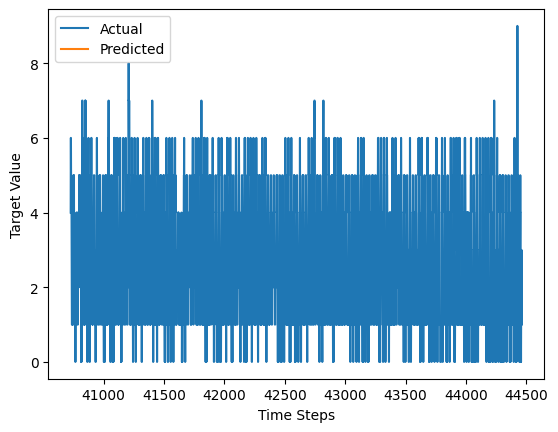

In [ ]:
import matplotlib.pyplot as plt

# This example assumes that you have a variable `y_test` containing the true target values for the test set
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Target Value')
plt.legend()
plt.show()


In [ ]:
# Define the split ratios (e.g., 80% train, 10% dev, 10% test)
train_ratio = 0.8
dev_ratio = 0.10
test_ratio = 0.10

# Calculate the indices for the splits
train_end = int(train_ratio * len(winsorized_df))
dev_end = int((train_ratio + dev_ratio) * len(winsorized_df))

# Split the dataset into train, dev, and test sets
train_data = winsorized_df.iloc[:train_end]
dev_data = winsorized_df.iloc[train_end:dev_end]
test_data = winsorized_df.iloc[dev_end:]

# Display the shapes of the resulting DataFrames
print("Train data shape:", train_data.shape)
print("Dev data shape:", dev_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (35566, 6)
Dev data shape: (4446, 6)
Test data shape: (4446, 6)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Separate the target variable from the rest of the dataset
target = dataset['weather_description_encoded']
df_without_target = dataset.drop(columns=['weather_description_encoded'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the remaining columns
scaled_columns = pd.DataFrame(scaler.fit_transform(df_without_target), columns=df_without_target.columns, index=df_without_target.index)

# Add the target variable back to the scaled dataset
df_scaled = scaled_columns.copy()
df_scaled['weather_description_encoded'] = target

print(df_scaled)

KeyError: ignored

In [ ]:
df_scaled.head()

,humidity,pressure,temperature,wind_direction,wind_speed,weather_description_encoded
datetime,,,,,,
2012-10-01,0.872340,0.40678,0.415779,0.416667,0.046512,10
2012-10-01,0.861702,0.40678,0.415658,0.408333,0.046512,20
2012-10-01,0.851064,0.40678,0.415310,0.391667,0.046512,20
2012-10-01,0.840426,0.40678,0.414962,0.375000,0.046512,20
2012-10-01,0.829787,0.40678,0.414614,0.358333,0.046512,20


## Handle Outliers

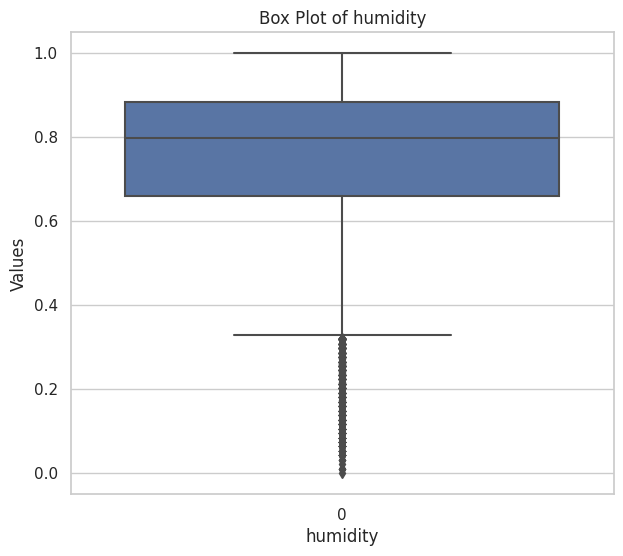

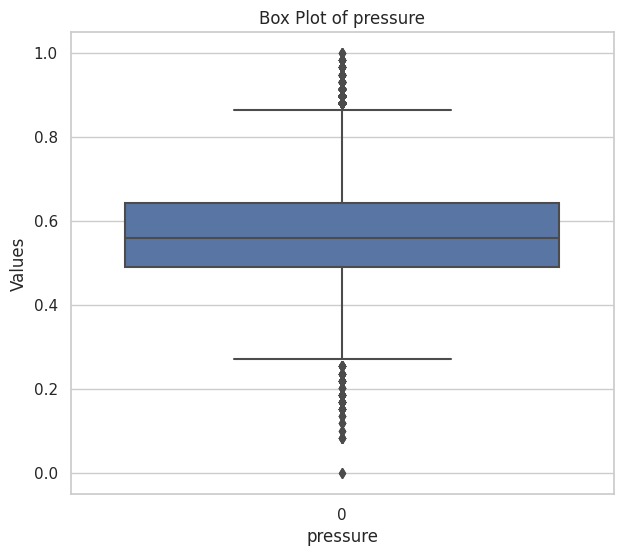

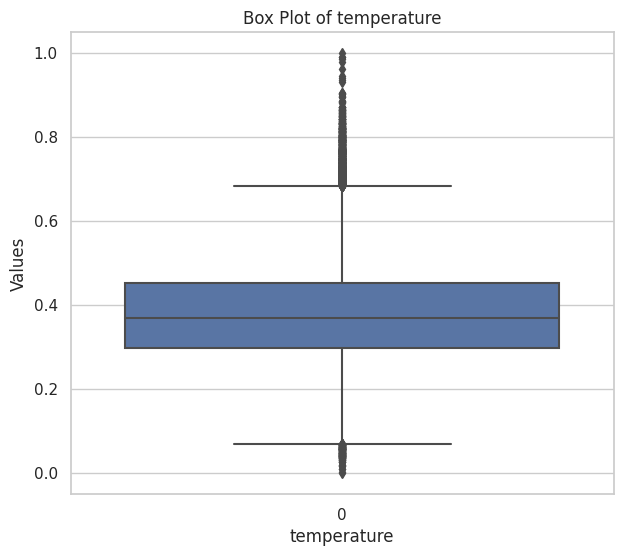

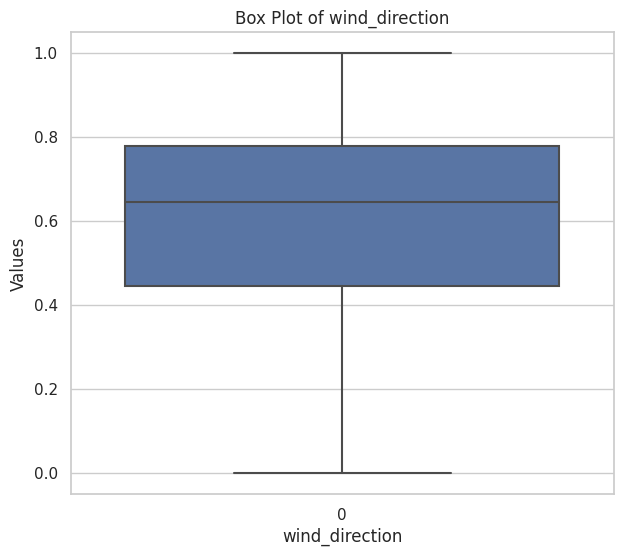

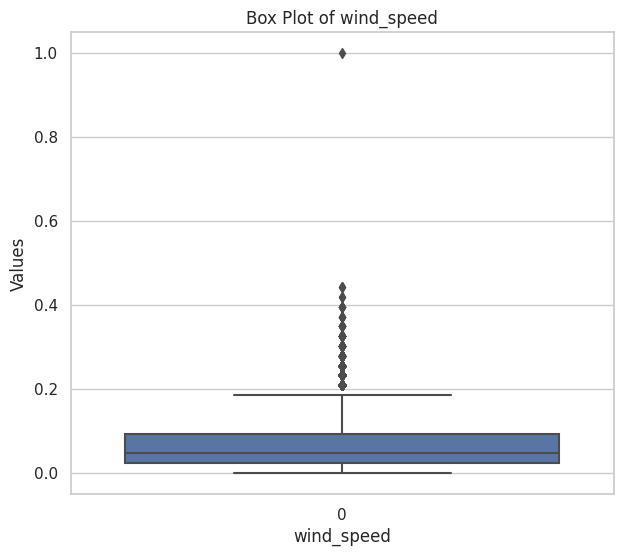

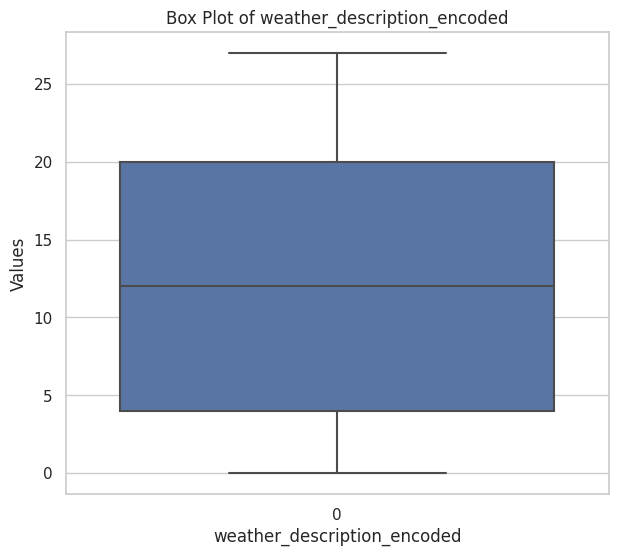

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt


# Set the plot style
sns.set(style="whitegrid")

# Create a box plot for each numerical column in your dataset
numerical_columns = df_scaled.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(7, 6))  # Adjust the figure size as needed
    sns.boxplot(data=df_scaled[column])

    # Set plot title and labels
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Values")

    # Show the plot
    plt.show()

In [ ]:


# Function to identify and count outliers using the IQR method
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return ((column < lower_bound) | (column > upper_bound)).sum()

# Count outliers for each numerical column
outlier_counts = {}
numerical_columns = df_scaled.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    outlier_count = count_outliers(df_scaled[column])
    outlier_counts[column] = outlier_count

# Print the number of outliers for each column
for column, count in outlier_counts.items():
    print(f"{column}: {count} outliers")


humidity: 1493 outliers
pressure: 872 outliers
temperature: 1167 outliers
wind_direction: 0 outliers
wind_speed: 1116 outliers
weather_description_encoded: 0 outliers


For outlier identifiction, we used interquartile range (IQR) method to detect outliers. IQR is the range between the 25th percentile (Q1) and the 75th percentile (Q3) of the data. Here's a step-by-step explanation of the process:

1- For each numerical column, function calculates the 25th percentile (Q1) and the 75th percentile (Q3).
2- Then, it calculates the interquartile range (IQR) as the difference between Q3 and Q1.
3- Using the IQR, it determines the lower and upper bounds for outliers:
- Lower bound = Q1 - 1.5 * IQR
- Upper bound = Q3 + 1.5 * IQR

4- Any data point in the column that falls below the lower bound or above the upper bound is considered an outlier.
The function counts the number of outliers in each column by checking whether each value is less than the lower bound or greater than the upper bound.
Finally, it stores the outlier count for each column in a dictionary and prints the results.

In [ ]:

# Define the lower and upper bounds for outliers using the IQR method
Q1 = df_scaled.quantile(0.25)
Q3 = df_scaled.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the values in the dataset to the lower and upper bounds
winsorized_df = df_scaled.clip(lower_bound, upper_bound, axis=1)

# Display the modified dataset
print(winsorized_df)

            humidity  pressure  temperature  wind_direction  wind_speed  \
datetime                                                                  
2012-10-01  0.872340  0.406780     0.415779        0.416667    0.046512   
2012-10-01  0.861702  0.406780     0.415658        0.408333    0.046512   
2012-10-01  0.851064  0.406780     0.415310        0.391667    0.046512   
2012-10-01  0.840426  0.406780     0.414962        0.375000    0.046512   
2012-10-01  0.829787  0.406780     0.414614        0.358333    0.046512   
...              ...       ...          ...             ...         ...   
2017-10-27  0.489362  0.525424     0.493708        0.400000    0.000000   
2017-10-27  0.324468  0.525424     0.550581        0.400000    0.000000   
2017-10-27  0.324468  0.508475     0.599226        0.769444    0.000000   
2017-10-27  0.324468  0.491525     0.649564        0.000000    0.046512   
2017-10-27  0.324468  0.491525     0.683200        0.000000    0.046512   

            weather_desc

To deal with outliers the Clippin or Capping method applied. We used the Pandas clip() function. This technique is called "Winsorizing" in statistics, and it can help reduce the influence of extreme values on our model while still preserving the overall distribution of the data.
It calculates the lower and upper bounds for outliers using the IQR method and then clips the values in the dataset to these bounds. Any value below the lower bound is replaced with the lower bound, and any value above the upper bound is replaced with the upper bound.

In [ ]:
winsorized_df.shape

(44458, 6)

In [ ]:
# Split the data into features (X) and targets (y)
def split_features_targets(data, target_column):
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    return X, y

# Split train, dev, and test sets into features and targets
target_column = 'weather_description_encoded'
X_train, y_train = split_features_targets(train_data, target_column)
X_dev, y_dev = split_features_targets(dev_data, target_column)
X_test, y_test = split_features_targets(test_data, target_column)

# Display the shapes of the resulting DataFrames
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_dev shape:", X_dev.shape)
print("y_dev shape:", y_dev.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (35566, 5)
y_train shape: (35566,)
X_dev shape: (4446, 5)
y_dev shape: (4446,)
X_test shape: (4446, 5)
y_test shape: (4446,)


In [ ]:
# Reshape the input data for LSTM

In [ ]:
import numpy as np

def reshape_for_lstm(X, time_steps):
    X_lstm = np.array([X[i : i + time_steps] for i in range(len(X) - time_steps)])
    return X_lstm

time_steps = 24  # we can adjust this value according to your needs

X_train_lstm = reshape_for_lstm(X_train, time_steps)
X_dev_lstm = reshape_for_lstm(X_dev, time_steps)
X_test_lstm = reshape_for_lstm(X_test, time_steps)

# Adjust the target shapes accordingly
y_train_lstm = y_train[time_steps:]
y_dev_lstm = y_dev[time_steps:]
y_test_lstm = y_test[time_steps:]

print("X_train_lstm shape:", X_train_lstm.shape)
print("y_train_lstm shape:", y_train_lstm.shape)
print("X_dev_lstm shape:", X_dev_lstm.shape)
print("y_dev_lstm shape:", y_dev_lstm.shape)
print("X_test_lstm shape:", X_test_lstm.shape)
print("y_test_lstm shape:", y_test_lstm.shape)


X_train_lstm shape: (35542, 24, 5)
y_train_lstm shape: (35542,)
X_dev_lstm shape: (4422, 24, 5)
y_dev_lstm shape: (4422,)
X_test_lstm shape: (4422, 24, 5)
y_test_lstm shape: (4422,)


In [ ]:
# Build the LSTM Model

from keras.models import Sequential
from keras.layers import LSTM, Dense

n_features = X_train.shape[1]

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, n_features)))
model.add(Dense(1))  # Adjust the output size if it's not a binary classification problem
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the LSTM Model

history = model.fit(
    X_train_lstm, y_train_lstm,
    validation_data=(X_dev_lstm, y_dev_lstm),
    epochs=50,  # You can adjust the number of epochs
    batch_size=32,  # You can adjust the batch size
    verbose=1
)

Epoch 1/50
1111/1111 [==============================] - 23s 19ms/step - loss: 55.8625 - accuracy: 0.0021 - val_loss: 46.7100 - val_accuracy: 0.0032
Epoch 2/50
1111/1111 [==============================] - 18s 17ms/step - loss: 50.9560 - accuracy: 0.0015 - val_loss: 40.6561 - val_accuracy: 0.0032
Epoch 3/50
1111/1111 [==============================] - 20s 18ms/step - loss: 50.2175 - accuracy: 0.0015 - val_loss: 42.4440 - val_accuracy: 0.0032
Epoch 4/50
1111/1111 [==============================] - 19s 17ms/step - loss: 49.8113 - accuracy: 0.0015 - val_loss: 42.8121 - val_accuracy: 0.0032
Epoch 5/50
1111/1111 [==============================] - 19s 17ms/step - loss: 49.6762 - accuracy: 0.0015 - val_loss: 45.1871 - val_accuracy: 0.0032
Epoch 6/50
1111/1111 [==============================] - 20s 18ms/step - loss: 49.3669 - accuracy: 0.0015 - val_loss: 45.6337 - val_accuracy: 0.0032
Epoch 7/50
1111/1111 [==============================] - 18s 16ms/step - loss: 48.7708 - accuracy: 0.0015 - val_l

In [ ]:
# Evalute the Model
loss, accuracy = model.evaluate(X_test_lstm, y_test_lstm)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


139/139 [==============================] - 1s 5ms/step - loss: 45.1572 - accuracy: 6.7843e-04
Test loss: 45.157249450683594
Test accuracy: 0.0006784260622225702


In [ ]:
# Make prediction
y_pred = model.predict(X_test_lstm)


139/139 [==============================] - 1s 5ms/step


In [ ]:
# Feature Engineering

datetime                object
humidity               float64
pressure               float64
temperature            float64
weather_description     object
wind_direction         float64
wind_speed             float64
dtype: object


In [ ]:
import folium

# Create a base map centered at the average latitude and longitude
avg_latitude, avg_longitude = city_attributes[['Latitude', 'Longitude']].mean()
map = folium.Map(location=[avg_latitude, avg_longitude], zoom_start=5)

# Add markers for each city
for index, row in city_attributes.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['City']}, {row['Country']}",
        tooltip=row['City'],
    ).add_to(map)

# Display the map
map


In [ ]:
dataset.tail(80)

In [ ]:
# Replace 'column_name' with the name of the column we want to check for unique values
value_counts = dataset['weather_description'].value_counts()

# Create a DataFrame with the count and percentage of unique values
unique_value_info = pd.DataFrame({
    'Count': value_counts,
    'Percentage': value_counts / len(dataset) * 100
})

# Reset the index and add a new first column with a count from 1 to n
unique_value_info = unique_value_info.reset_index().rename(columns={'index': 'Value'})
unique_value_info.insert(0, 'No.', range(1, len(unique_value_info) + 1))

# Display the DataFrame without the index
print(unique_value_info.to_string(index=False))

 No.                            Value  Count  Percentage
   1                     sky is clear  12654   27.962787
   2                             mist   8074   17.841911
   3                    broken clouds   4006    8.852452
   4                       few clouds   3835    8.474576
   5                 scattered clouds   3769    8.328730
   6                       light rain   3403    7.519943
   7                             haze   2908    6.426093
   8                  overcast clouds   2360    5.215124
   9                    moderate rain   1062    2.346806
  10                              fog    920    2.033014
  11                            smoke    377    0.833094
  12             heavy intensity rain    257    0.567918
  13          light intensity drizzle    187    0.413232
  14            proximity shower rain    173    0.382295
  15                     thunderstorm    102    0.225399
  16           proximity thunderstorm     90    0.198882
  17                          d

In [ ]:
# Calculate the number of null values in each column
null_values = dataset.isnull().sum()

# Calculate the percentage of null values in each column
null_percentages = (dataset.isnull().sum() / len(dataset)) * 100

# Combine the number and percentage of null values in a new DataFrame
null_info = pd.concat([null_values, null_percentages], axis=1)
null_info.columns = ['Number of Nulls', 'Percentage of Nulls']

# Display the null values information
print(null_info)

                     Number of Nulls  Percentage of Nulls
datetime                           0             0.000000
humidity                         942             2.081630
pressure                         815             1.800986
temperature                      793             1.752370
weather_description              793             1.752370
wind_direction                   794             1.754580
wind_speed                       794             1.754580


                 datetime  humidity  pressure  temperature  \
1     2012-10-01 13:00:00      88.0    1009.0   289.480000   
2     2012-10-01 14:00:00      87.0    1009.0   289.474993   
3     2012-10-01 15:00:00      86.0    1009.0   289.460618   
4     2012-10-01 16:00:00      85.0    1009.0   289.446243   
5     2012-10-01 17:00:00      84.0    1009.0   289.431869   
...                   ...       ...       ...          ...   
44454 2017-10-27 18:00:00      52.0    1016.0   292.700000   
44455 2017-10-27 19:00:00      34.0    1016.0   295.050000   
44456 2017-10-27 20:00:00      28.0    1015.0   297.060000   
44457 2017-10-27 21:00:00      25.0    1014.0   299.140000   
44458 2017-10-27 22:00:00      22.0    1014.0   300.560000   

      weather_description  wind_direction  wind_speed  
1              light rain           150.0         2.0  
2            sky is clear           147.0         2.0  
3            sky is clear           141.0         2.0  
4            sky is clear      

In [ ]:
filled_dataset.head()

,datetime,humidity,pressure,temperature,weather_description,wind_direction,wind_speed
1,2012-10-01 13:00:00,88.0,1009.0,289.480000,light rain,150.0,2.0
2,2012-10-01 14:00:00,87.0,1009.0,289.474993,sky is clear,147.0,2.0
3,2012-10-01 15:00:00,86.0,1009.0,289.460618,sky is clear,141.0,2.0
4,2012-10-01 16:00:00,85.0,1009.0,289.446243,sky is clear,135.0,2.0
5,2012-10-01 17:00:00,84.0,1009.0,289.431869,sky is clear,129.0,2.0


In [ ]:
import pandas as pd

# Assuming your dataset is in a DataFrame called 'filled_dataset'
summary_statistics = filled_dataset.describe()

# Display the summary statistics
print(summary_statistics)


           humidity      pressure   temperature  wind_direction    wind_speed
count  44458.000000  44458.000000  44458.000000    44458.000000  44458.000000
mean      76.844792   1018.841854    288.155217      209.304984      2.786833
std       17.406552      7.333726      5.332223       95.589126      2.284118
min        6.000000    985.000000    272.300000        0.000000      0.000000
25%       68.000000   1014.000000    284.670000      160.000000      1.000000
50%       81.000000   1018.000000    287.610000      232.000000      2.000000
75%       89.000000   1023.000000    291.013935      280.000000      4.000000
max      100.000000   1044.000000    313.620000      360.000000     43.000000


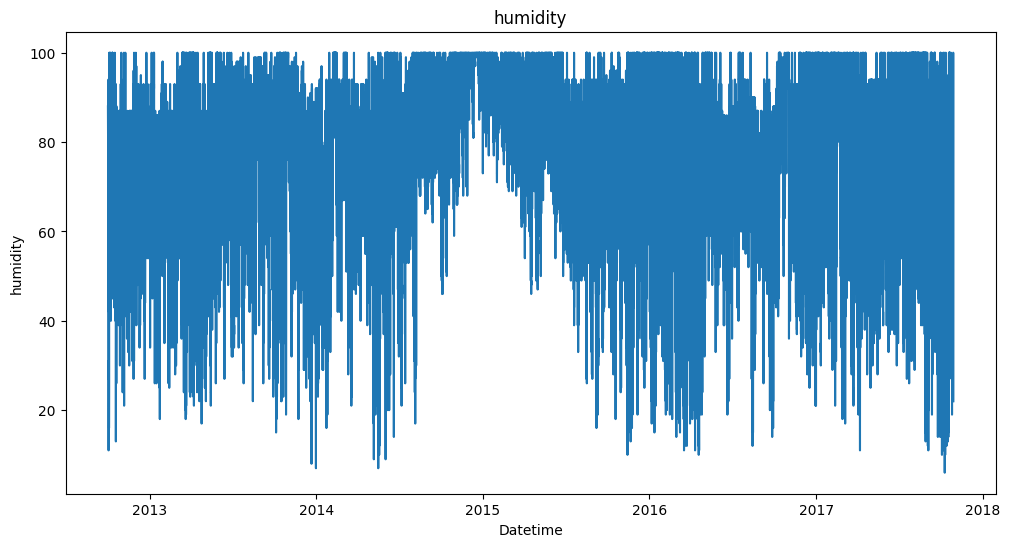

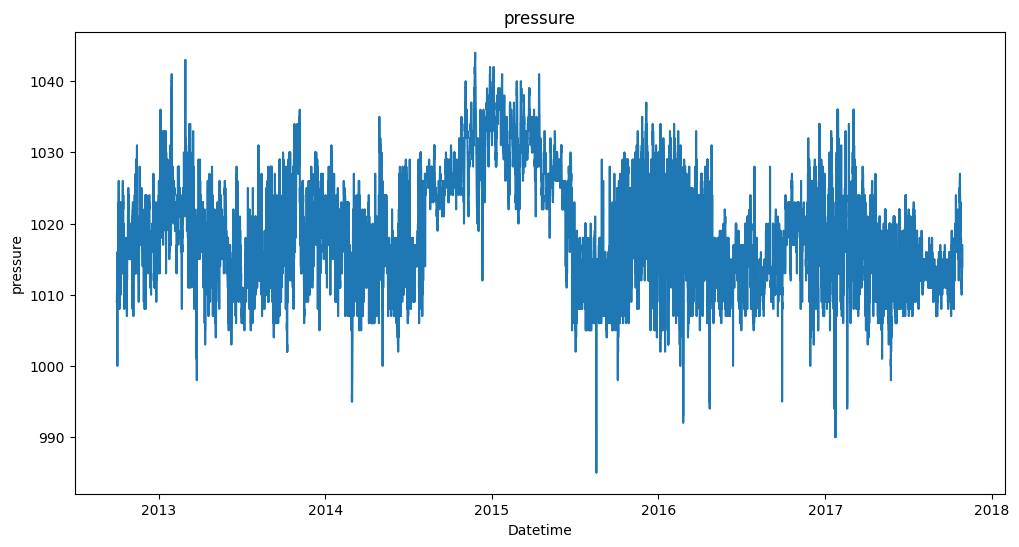

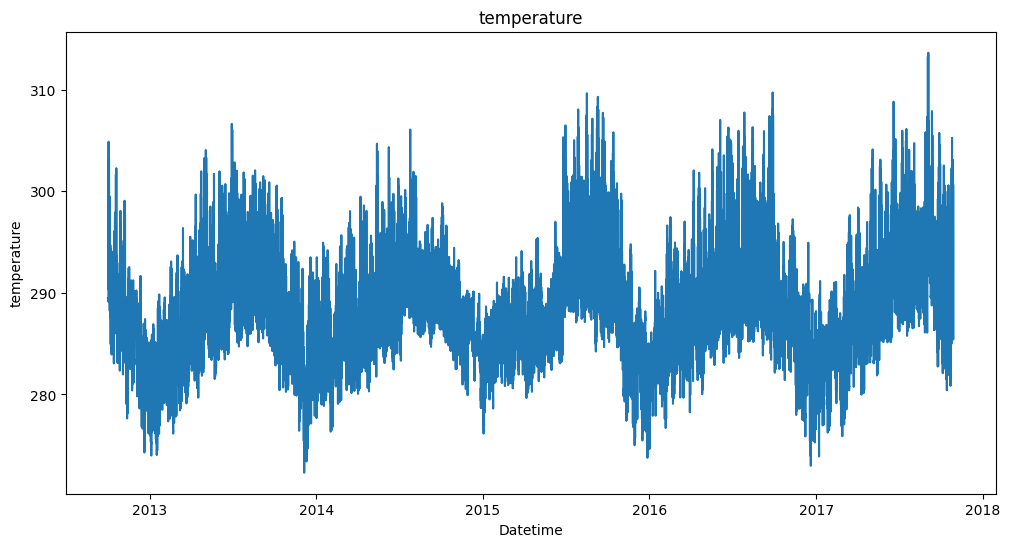

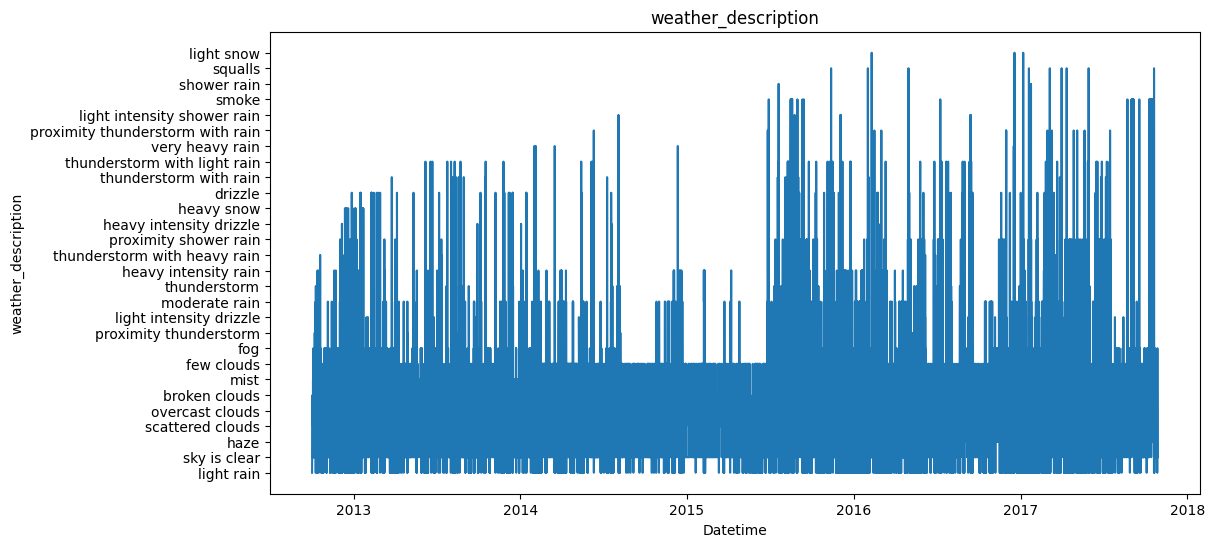

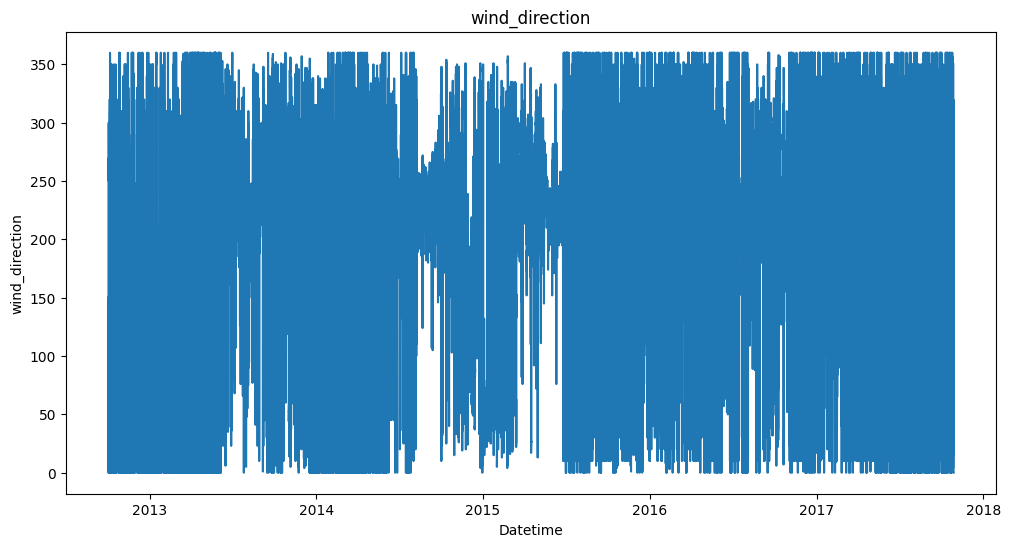

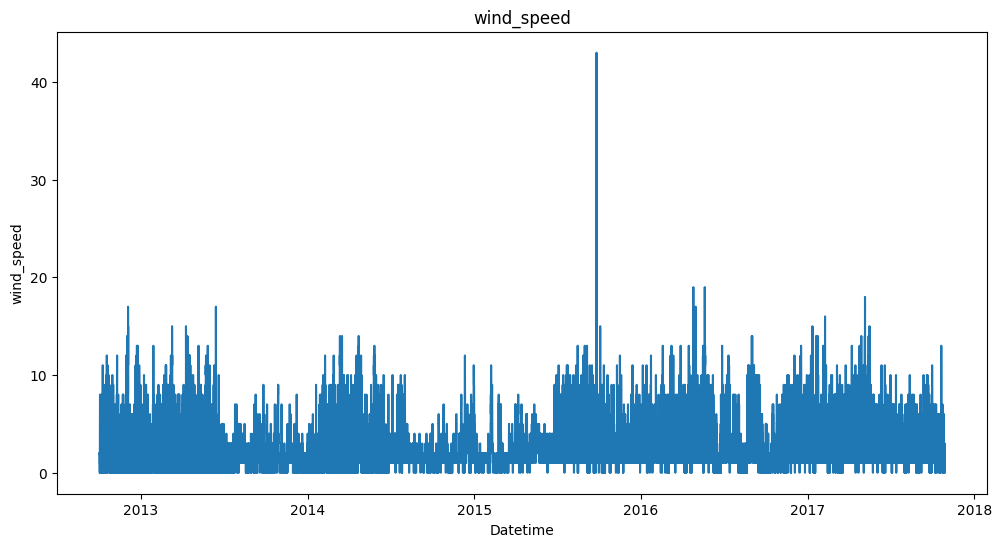

In [ ]:
# Calculate Z-scores for numeric columns
numeric_columns = filled_dataset.select_dtypes(include=np.number)
z_scores = (numeric_columns - numeric_columns.mean()) / numeric_columns.std()

# Set a threshold for outliers
threshold = 3

# Identify potential outliers
outliers = (z_scores > threshold).any(axis=1)
outlier_rows = filled_dataset[outliers]

# Display the rows with potential outliers
print(outlier_rows)


                 datetime  humidity  pressure  temperature  \
34    2012-10-02 22:00:00      18.0    1013.0       304.70   
35    2012-10-02 23:00:00      11.0    1013.0       304.86   
181   2012-10-09 01:00:00      59.0    1014.0       290.35   
372   2012-10-17 00:00:00      68.0    1016.0       296.72   
395   2012-10-17 23:00:00      72.0    1013.0       297.63   
...                   ...       ...       ...          ...   
43793 2017-09-30 05:00:00      82.0    1015.0       289.85   
44275 2017-10-20 07:00:00      93.0    1012.0       288.42   
44386 2017-10-24 22:00:00      20.0    1016.0       304.92   
44387 2017-10-24 23:00:00      19.0    1016.0       305.25   
44388 2017-10-25 00:00:00      28.0    1016.0       305.09   

      weather_description  wind_direction  wind_speed  
34           sky is clear           300.0         6.0  
35           sky is clear           280.0         7.0  
181      scattered clouds           260.0        11.0  
372            few clouds      